In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras_vggface.vggface import VGGFace
from keras.utils.data_utils import get_file
from keras_vggface.utils import preprocess_input
from Helper import decode_predictions

V2_LABELS_PATH = 'https://github.com/rcmalli/keras-vggface/releases/download/v2.0/rcmalli_vggface_labels_v2.npy'
VGGFACE_DIR = 'models/vggface'

In [4]:
# Testing Target
fpath = get_file('rcmalli_vggface_labels_v2.npy', V2_LABELS_PATH, cache_subdir=VGGFACE_DIR)
LABELS = np.load(fpath)
## Format of ' FIRSTNAME_LASTNAME'
Target_ID = np.where(LABELS == ' Channing_Tatum')

# Load Generator Model and vggface
test_model = tf.keras.models.load_model("Saved_Models/" + LABELS[Target_ID[0][0]] + "_Model/generator-" + str(Target_ID[0][0]))
test_model.summary()
model = VGGFace(model='resnet50')

In [ ]:
# Test loaded model
generated_image = test_model(tf.random.normal([1,100]), training=True)
plt.imshow(generated_image[0])

# Save Tested Image
plt.imsave("Images/" + LABELS[Target_ID[0][0]] + ".png" , generated_image.numpy()[0])

generated_image = generated_image * 255

generated_image = preprocess_input(generated_image, version = 2)
    
yhat = model(generated_image)

results = decode_predictions(yhat)

# display most likely results
for result in results[0]:
    print('id:%i %s: %.3f%%' % (result[2], result[0], result[1]*100))

id:2168 b' Dwayne_Johnson': 99.967%
id:7487 b' Sid_Haig': 0.005%
id:7407 b' Shane_Victorino': 0.001%
id:4735 b' Leeann_Tweeden': 0.001%
id:3755 b' Jerry_Mateparae': 0.001%


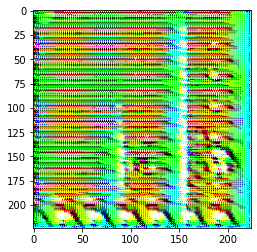

In [5]:
# Load Tested image

image = plt.imread('Images/' + LABELS[Target_ID[0][0]] + ".png")

plt.imshow(image)

image = image[...,0:3] * 255
image = np.expand_dims(image, axis=0)

image = preprocess_input(image, version = 2)
    
yhat = model(image)

results = decode_predictions(yhat)

# display most likely results
for result in results[0]:
    print('id:%i %s: %.3f%%' % (result[2], result[0], result[1]*100))